In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
start = pd.read_csv("start.csv", sep=";")
mid = pd.read_csv("mid.csv", sep=";")
end = pd.read_csv("end.csv", sep=";")
types = {
    0: "B",
    1: "T",
    2: "Ag",
    3: "Ab"
}

In [17]:
start["Type"] = start["Type"].map(types)
mid["Type"] = mid["Type"].map(types)
end["Type"] = end["Type"].map(types)

In [18]:
(
    pd.DataFrame({
        "start": start["Type"].value_counts(),
        "mid": mid["Type"].value_counts(),
        "end": end["Type"].value_counts()
    })
    .fillna(0)
    .transpose()
    .astype(int)
)

,Ab,Ag,B,T
start,0,2040,168,166
mid,3084,67,939,166
end,8964,5,2409,166


In [43]:
colors = {
    "B": "blue",
    "T": "purple",
    "Ag": "red",
    "Ab": "green"
}

In [63]:
def scatter_cells(data, colors):
    grouped_data = data.groupby("Type")
    plots = {t: plt.scatter(group["Pos_x"], group["Pos_y"], s=2, alpha=0.7, c=colors[t]) for t, group in grouped_data}
    plt.legend(plots.values(), plots.keys(), ncol=len(plots))
    plt.show()

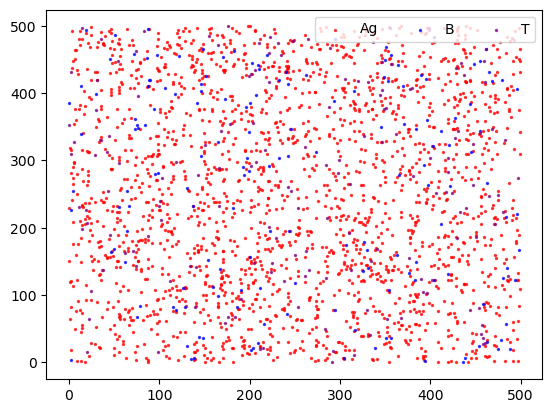

In [64]:
scatter_cells(start, colors)

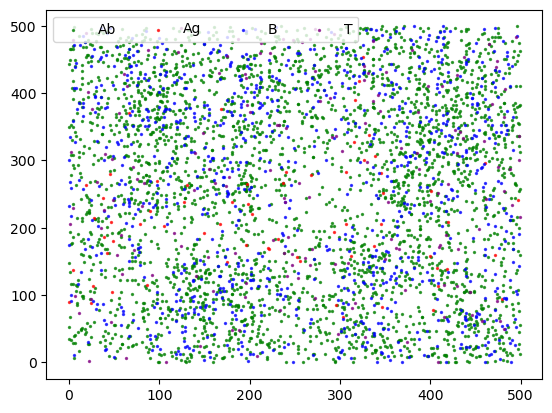

In [65]:
scatter_cells(mid, colors)

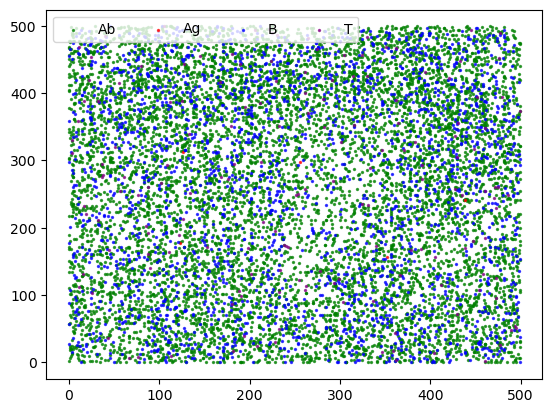

In [66]:
scatter_cells(end, colors)